In [1]:
# Instalación de librerías
#!pip install roboflow

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="q9Sco1nMXziI1THDX24G")
project = rf.workspace().project("inflorescencias")
model = project.version(2).model

loading Roboflow workspace...
loading Roboflow project...


In [3]:
import cv2
#%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
#plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 300

In [4]:
def get_predictions(local_path: str):
    return model.predict(local_path).json()

In [5]:
def render(image: np.ndarray):
    plt.imshow(image)
    #plt.close()
    return plt.show()

In [6]:
def highlight(image: np.ndarray, regions):
    labeled_image = image.copy()
    for rectangle in regions["predictions"]:
        x1 = int(rectangle["x"])
        y1 = int(rectangle["y"])
        x2 = int(rectangle["x"])+int(rectangle["width"])
        y2 = int(rectangle["y"])+int(rectangle["height"])
        border_width = int(max(image.shape[:-1])*0.005)
        labeled_image = cv2.rectangle(labeled_image, (x1, y1), (x2, y2), (255, 0, 255), border_width)
    return labeled_image

In [7]:
def label_image(image: np.ndarray, regions):
    labeled_image = image.copy()
    for rectangle in regions["predictions"]:
        x, y = int(rectangle["x"]), int(rectangle["y"])
        confidence = f'{int(float(rectangle["confidence"])*10000)/100} %'
        font_size = 6*max(image.shape[:-1])/4000
        font_thickness = 4*max(image.shape[:-1])//4000
        labeled_image = cv2.putText(labeled_image, confidence, (x, y), cv2.FONT_HERSHEY_PLAIN, font_size, (0,255,255), 
            font_thickness, 1
        );
    return labeled_image

In [8]:
def infer(local_path):
    regions = get_predictions(local_path)
    image = cv2.imread(local_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = highlight(image, regions)
    image = label_image(image, regions)
    print("Cantidad", len(regions["predictions"]))
    return render(image)

Cantidad 1


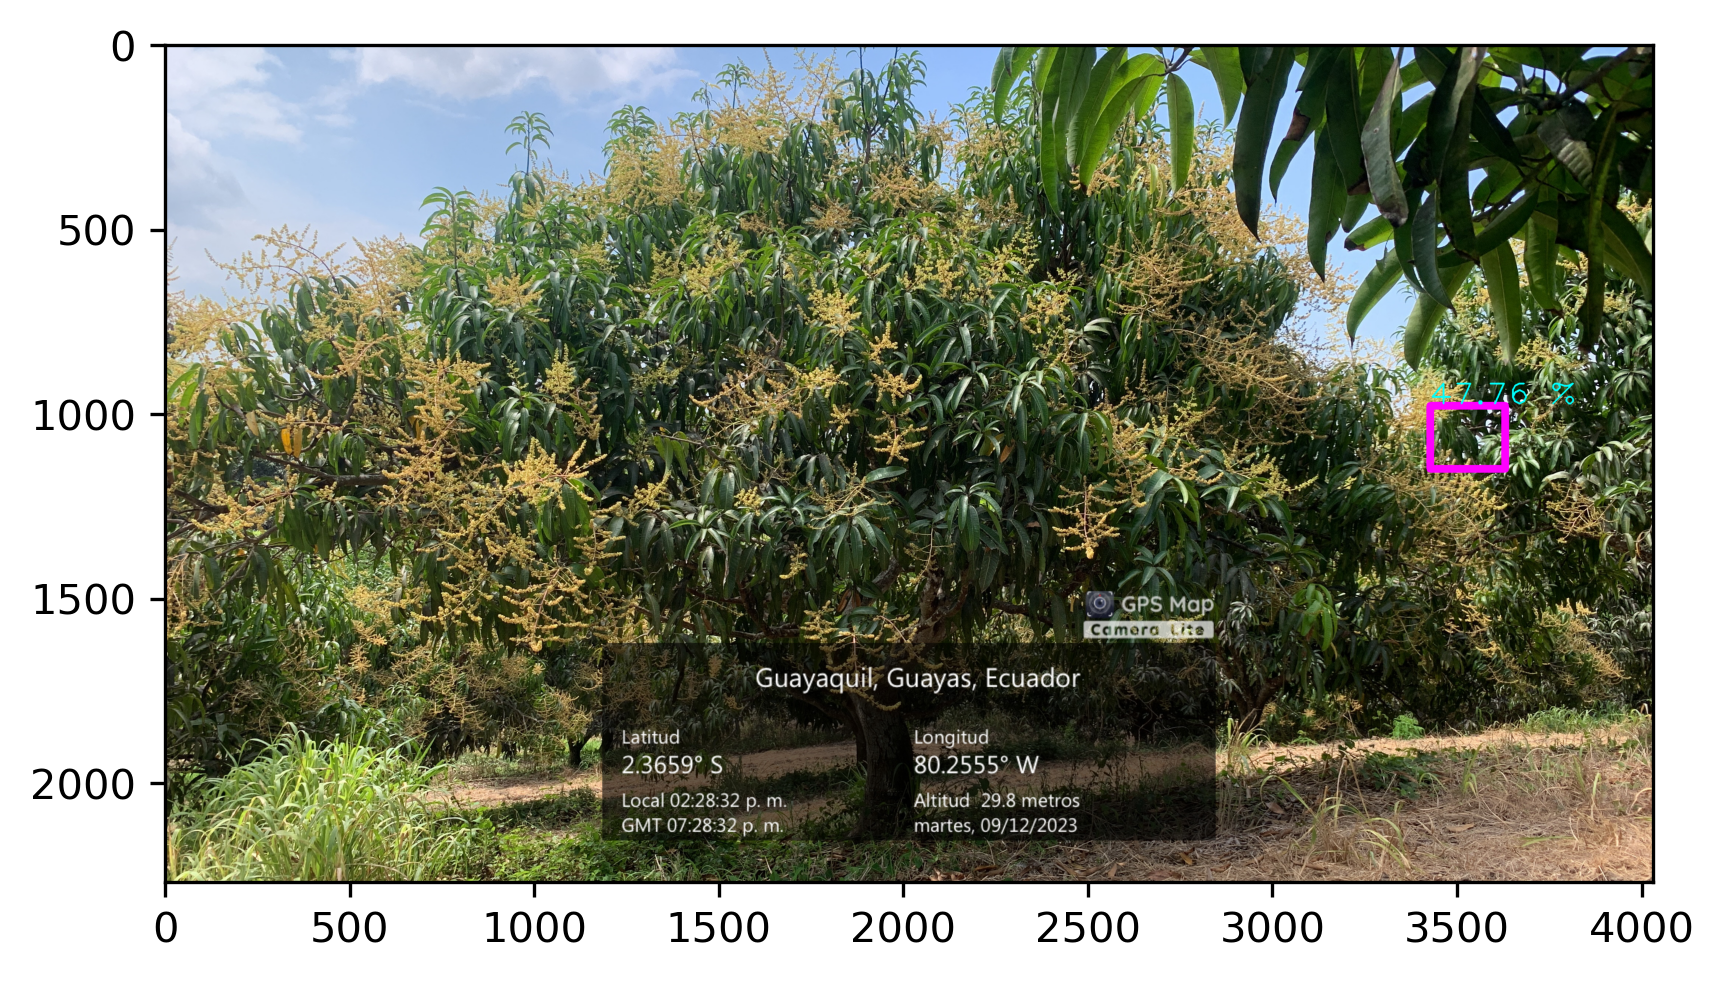

In [9]:
infer("CCMANGOS FOTOS/MANGO ATAULFO/LADO B/A9L4F12T5-B.jpg")

Cantidad 0


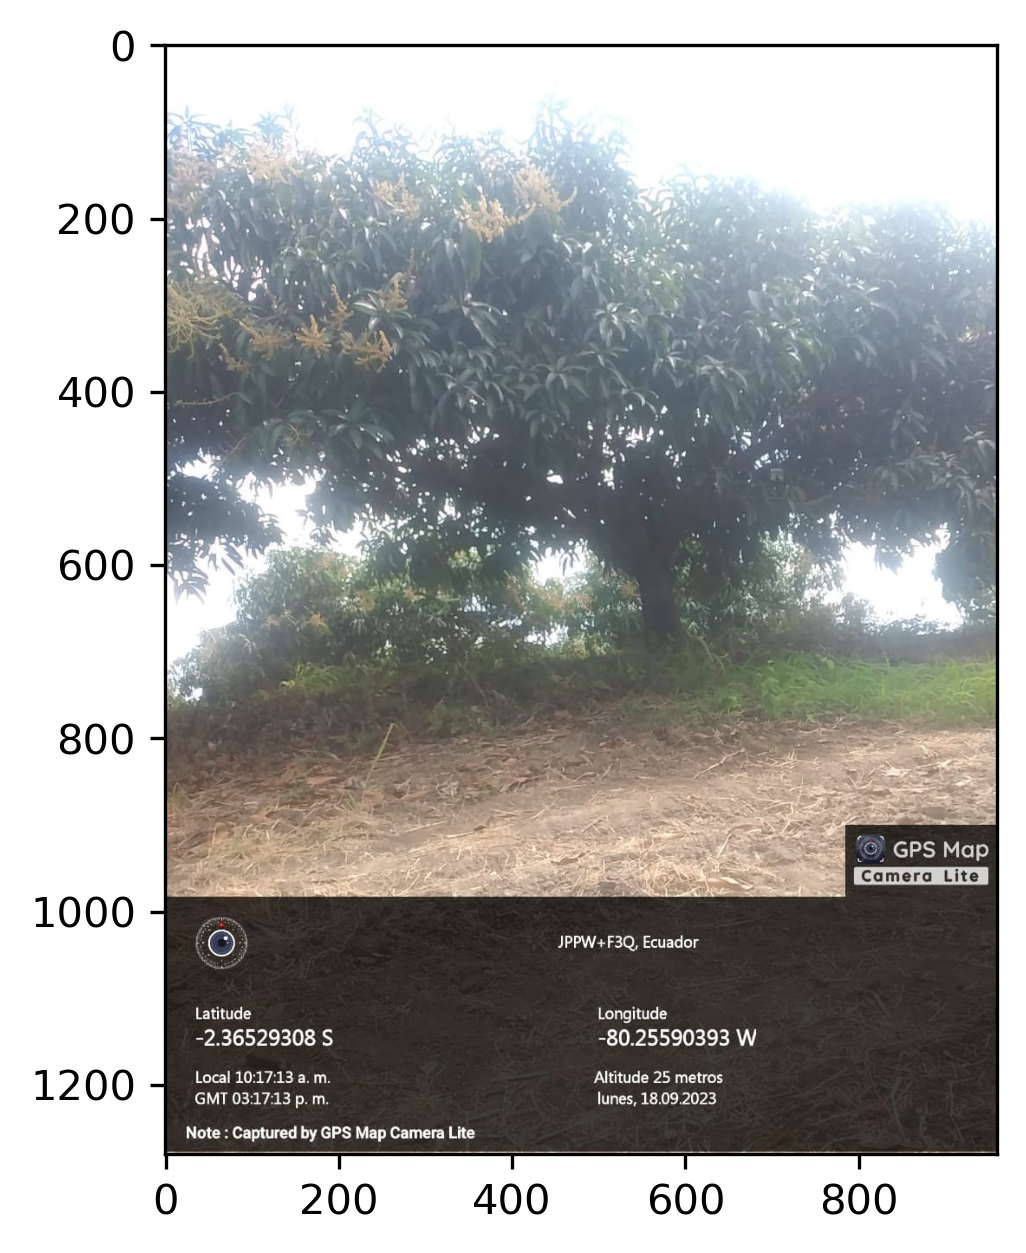

In [10]:
infer("CCMANGOS FOTOS/MANGO ATAULFO/LADO B/Foto de _(22).jpg")

Cantidad 0


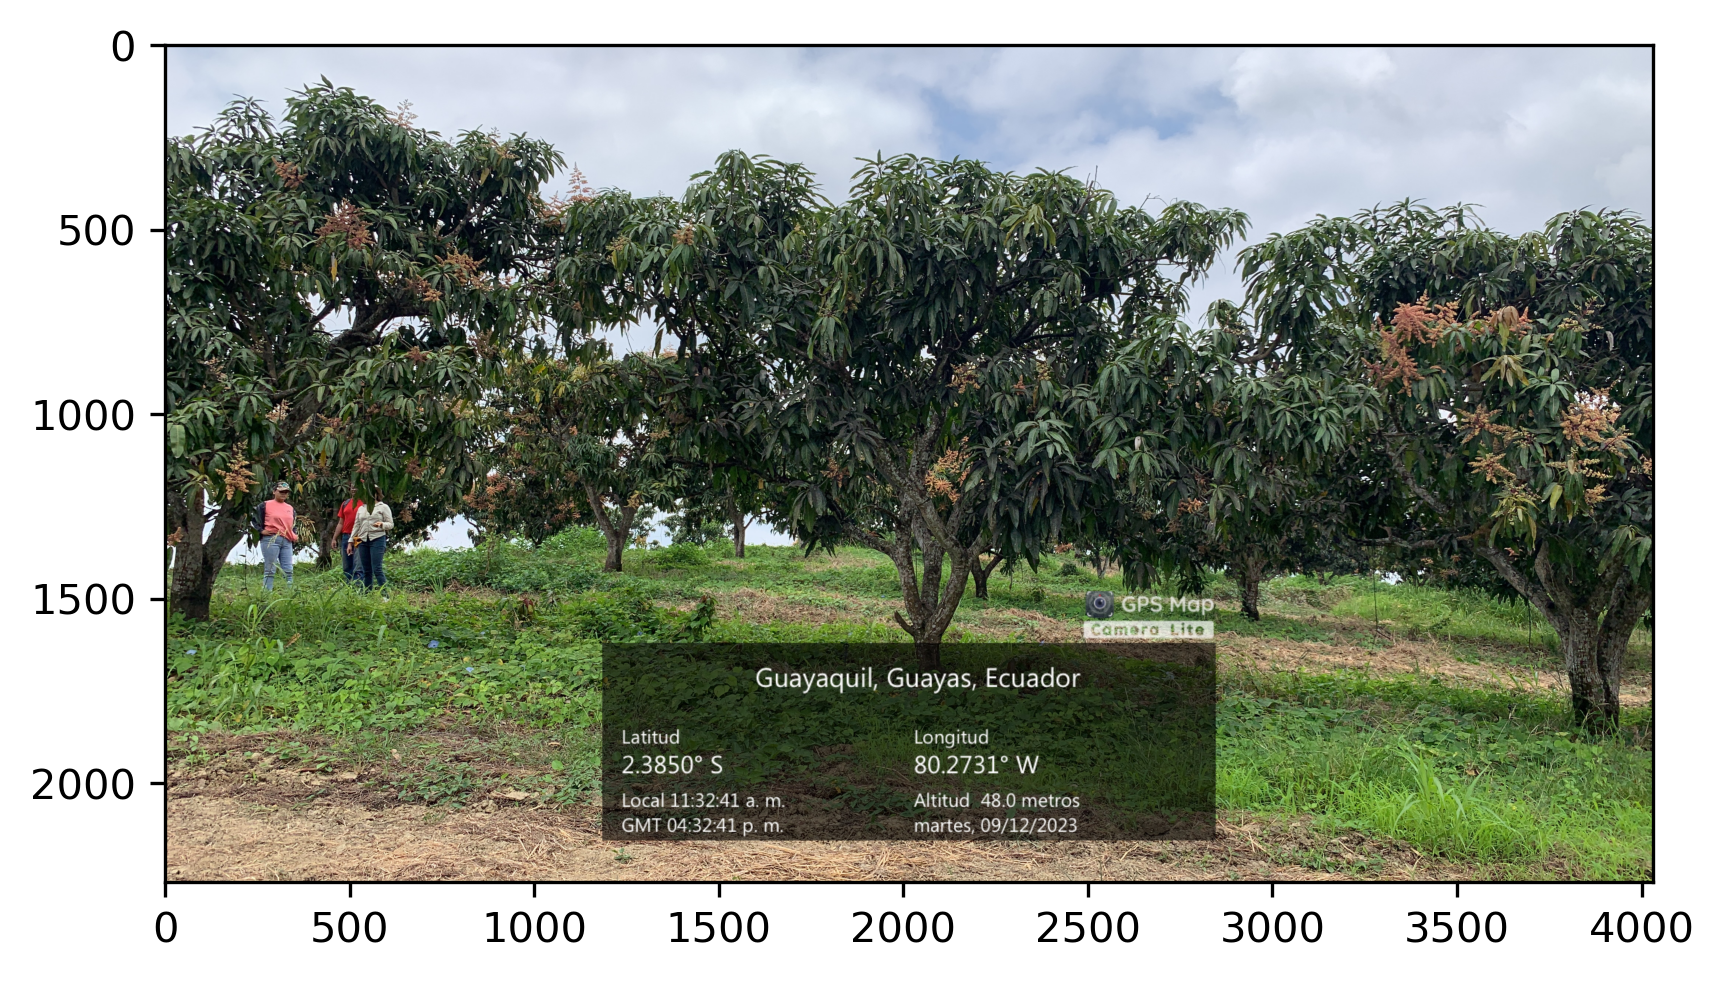

In [11]:
infer("CCMANGOS FOTOS/MANGO TOMMY/LADO B/A2L1F7T7-B.jpg")